<a href="https://colab.research.google.com/github/kalyaannnn/NLPReference/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from keras.datasets import imdb

In [4]:
vocab_size = 2500
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)
print("Dataset with {} training samples and {} test samples".format(len(X_train), len(X_test)))

Dataset with 25000 training samples and 25000 test samples


In [5]:
print("Review")
print(X_train[10])
print("Label")
print(y_train[10])

Review
[1, 785, 189, 438, 47, 110, 142, 7, 6, 2, 120, 4, 236, 378, 7, 153, 19, 87, 108, 141, 17, 1004, 5, 2, 883, 2, 23, 8, 4, 136, 2, 2, 4, 2, 43, 1076, 21, 1407, 419, 5, 2, 120, 91, 682, 189, 2, 5, 9, 1348, 31, 7, 4, 118, 785, 189, 108, 126, 93, 2, 16, 540, 324, 23, 6, 364, 352, 21, 14, 9, 93, 56, 18, 11, 230, 53, 771, 74, 31, 34, 4, 2, 7, 4, 22, 5, 14, 11, 471, 9, 2, 34, 4, 321, 487, 5, 116, 15, 2, 4, 22, 9, 6, 2286, 4, 114, 2, 23, 107, 293, 1008, 1172, 5, 328, 1236, 4, 1375, 109, 9, 6, 132, 773, 2, 1412, 8, 1172, 18, 2, 29, 9, 276, 11, 6, 2, 19, 289, 409, 4, 2, 2140, 2, 648, 1430, 2, 2, 5, 27, 2, 1432, 2, 103, 6, 346, 137, 11, 4, 2, 295, 36, 2, 725, 6, 2, 273, 11, 4, 1513, 15, 1367, 35, 154, 2, 103, 2, 173, 7, 12, 36, 515, 2, 94, 2, 1722, 5, 2, 36, 203, 30, 502, 8, 361, 12, 8, 989, 143, 4, 1172, 2, 10, 10, 328, 1236, 9, 6, 55, 221, 2, 5, 146, 165, 179, 770, 15, 50, 713, 53, 108, 448, 23, 12, 17, 225, 38, 76, 2, 18, 183, 8, 81, 19, 12, 45, 1257, 8, 135, 15, 2, 166, 4, 118, 7, 45, 2,

In [7]:
word2ID = imdb.get_word_index()
id2word = {i :word for word, i in word2ID.items()}
print("Review in words")
print([id2word.get(i, '') for i in X_train[10]])
print("Label")
print(y_train[10])

Review in words
['the', 'clear', 'fact', 'entertaining', 'there', 'life', 'back', 'br', 'is', 'and', 'show', 'of', 'performance', 'stars', 'br', 'actors', 'film', 'him', 'many', 'should', 'movie', 'reasons', 'to', 'and', 'reading', 'and', 'are', 'in', 'of', 'scenes', 'and', 'and', 'of', 'and', 'out', 'compared', 'not', 'boss', 'yes', 'to', 'and', 'show', 'its', 'disappointed', 'fact', 'and', 'to', 'it', 'justice', 'by', 'br', 'of', 'where', 'clear', 'fact', 'many', 'your', 'way', 'and', 'with', 'city', 'nice', 'are', 'is', 'along', 'wrong', 'not', 'as', 'it', 'way', 'she', 'but', 'this', 'anything', 'up', "haven't", 'been', 'by', 'who', 'of', 'and', 'br', 'of', 'you', 'to', 'as', 'this', "i'd", 'it', 'and', 'who', 'of', 'shot', "you'll", 'to', 'love', 'for', 'and', 'of', 'you', 'it', 'is', 'sequels', 'of', 'little', 'and', 'are', 'seen', 'watched', 'front', 'chemistry', 'to', 'simply', 'alive', 'of', 'chris', 'being', 'it', 'is', 'say', 'easy', 'and', 'cry', 'in', 'chemistry', 'but', '

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_size = 250

X_test = pad_sequences(X_test, maxlen= max_size)
X_train = pad_sequences(X_train, maxlen = max_size)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

embedding_size = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length = max_size))
model.add(LSTM(100))
model.add(Dense(1, activation = 'sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 32)           80000     
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 133,301
Trainable params: 133,301
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 32)           80000     
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 133,301
Trainable params: 133,301
Non-trainable params: 0
_________________________________________________________________


In [24]:
batch_size = 64
n_epochs = 3

X_valid, y_valid = X_train[: batch_size], y_train[: batch_size]
X_train2, y_train2 = X_train[batch_size :], y_train[batch_size :]

history = model.fit(X_train2, y_train2, validation_data = (X_valid, y_valid), batch_size = batch_size, epochs = n_epochs)

Epoch 1/3
390/390 [==============================] - 78s 201ms/step - loss: 0.2695 - accuracy: 0.8907 - val_loss: 0.1843 - val_accuracy: 0.9531
Epoch 2/3
390/390 [==============================] - 77s 199ms/step - loss: 0.2574 - accuracy: 0.8968 - val_loss: 0.1889 - val_accuracy: 0.9688
Epoch 3/3
390/390 [==============================] - 77s 197ms/step - loss: 0.2397 - accuracy: 0.9062 - val_loss: 0.2509 - val_accuracy: 0.8906


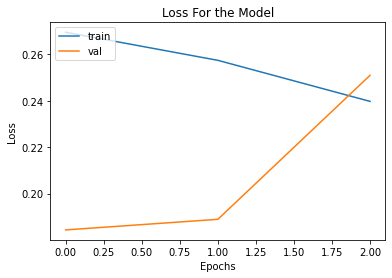

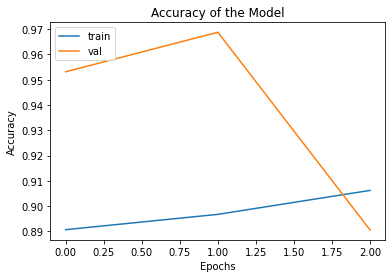

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss For the Model")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train','val'], loc = "upper left")
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['train','val'], loc = "upper left")
plt.show()